In [120]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Statistical Tests
import scipy.stats as stats

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import wrangle_zillow as wrangle
import model

In [2]:
zillow_df = wrangle.get_zillow(wrangle.sql)

In [3]:
df = wrangle.wrangle_zillow()

In [4]:
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,county
0,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,Orange
1,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,Ventura
2,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,6.0,1.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,Orange
3,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,Los Angeles
4,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,0.0,1.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,Los Angeles


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69523 entries, 0 to 77380
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   69523 non-null  float64
 1   bedroomcnt                    69523 non-null  float64
 2   buildingqualitytypeid         69523 non-null  float64
 3   calculatedfinishedsquarefeet  69523 non-null  float64
 4   fips                          69523 non-null  float64
 5   latitude                      69523 non-null  float64
 6   longitude                     69523 non-null  float64
 7   lotsizesquarefeet             69523 non-null  float64
 8   rawcensustractandblock        69523 non-null  float64
 9   regionidcity                  69523 non-null  float64
 10  regionidcounty                69523 non-null  float64
 11  regionidzip                   69523 non-null  float64
 12  roomcnt                       69523 non-null  float64
 13  u

In [6]:
df = wrangle.create_features(df)
df.head().T

,0,1,2,3,4
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
buildingqualitytypeid,6.0,6.0,6.0,8.0,8.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
fips,6059.0,6111.0,6059.0,6037.0,6037.0
latitude,33634931.0,34449266.0,33886168.0,34245180.0,34185120.0
longitude,-117869207.0,-119281531.0,-117823170.0,-118240722.0,-118414640.0
lotsizesquarefeet,4506.0,12647.0,8432.0,13038.0,278581.0
rawcensustractandblock,60590630.072012,61110010.023006,60590218.022012,60373001.001006,60371236.012
regionidcity,53571.0,13091.0,21412.0,396551.0,12447.0


In [7]:
#### I need to split the df into the train, val, test and the x_train, y_train, y_test etc.
#### When do I scale?????

#taxrate, taxamount, taxvaluedollarcnt, structuretaxvaluedollarcnt, landtaxvaluedollarcnt: info captured in tax_bin + structure_dollar_per_sqft + land_dollar_per_sqft + acres

In [8]:
df_1 = df.drop(columns = ['taxamount', 'fips', 
                                       'yearbuilt', 
                                       'lotsizesquarefeet', 'regionidcity', 'regionidzip', 
                                       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 
                         ])
df_1.head().T

,0,1,2,3,4
bathroomcnt,3.5,1.0,2.0,3.0,3.0
bedroomcnt,4.0,2.0,3.0,4.0,3.0
buildingqualitytypeid,6.0,6.0,6.0,8.0,8.0
calculatedfinishedsquarefeet,3100.0,1465.0,1243.0,2376.0,1312.0
latitude,33634931.0,34449266.0,33886168.0,34245180.0,34185120.0
longitude,-117869207.0,-119281531.0,-117823170.0,-118240722.0,-118414640.0
rawcensustractandblock,60590630.072012,61110010.023006,60590218.022012,60373001.001006,60371236.012
regionidcounty,1286.0,2061.0,1286.0,3101.0,3101.0
roomcnt,0.0,5.0,6.0,0.0,0.0
unitcnt,1.0,1.0,1.0,1.0,1.0


In [9]:
df_1.shape

(69523, 26)

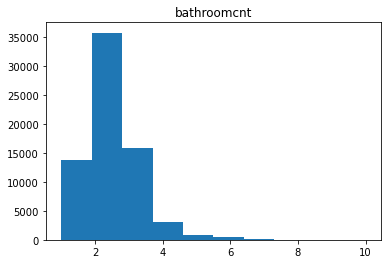

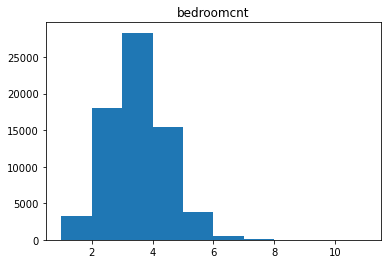

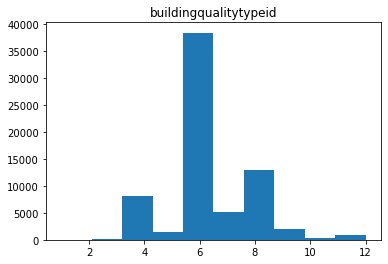

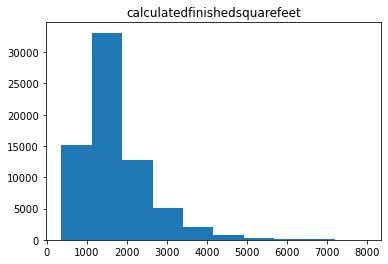

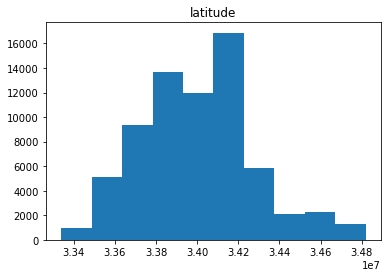

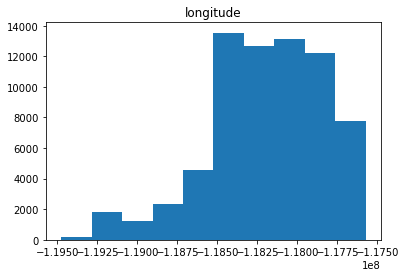

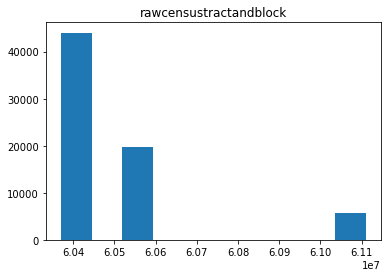

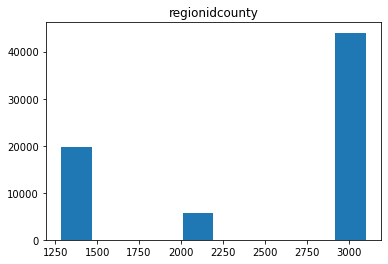

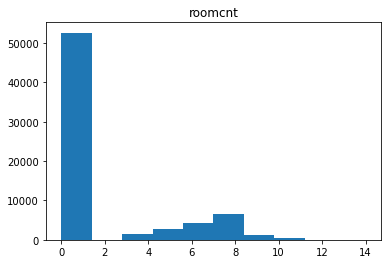

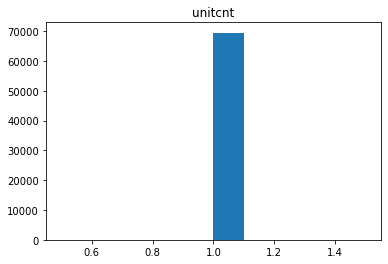

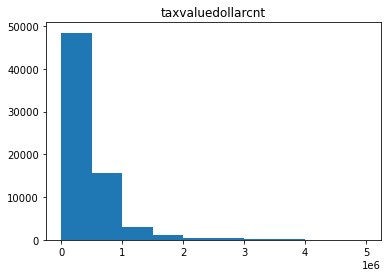

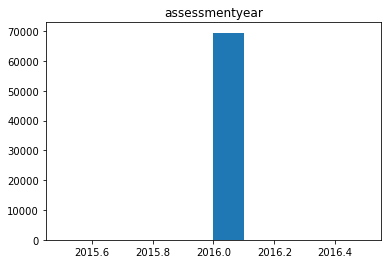

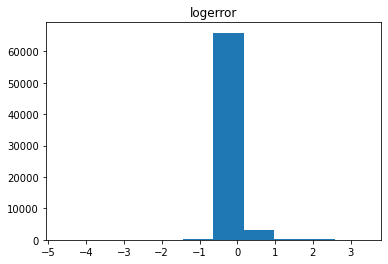

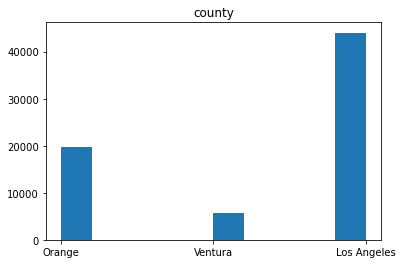

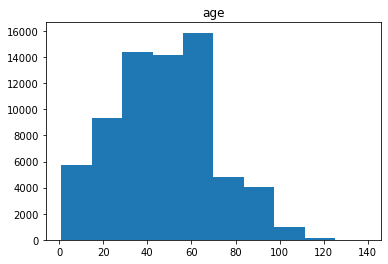

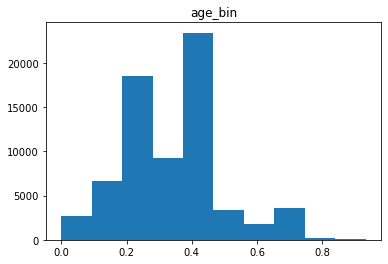

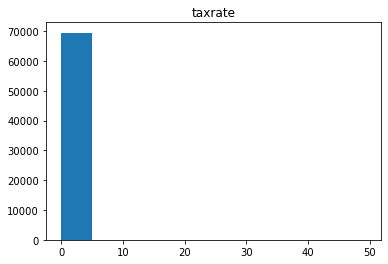

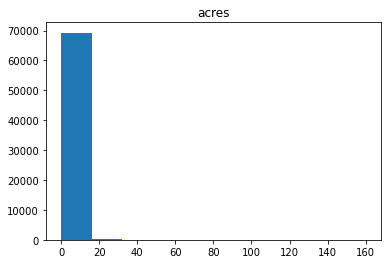

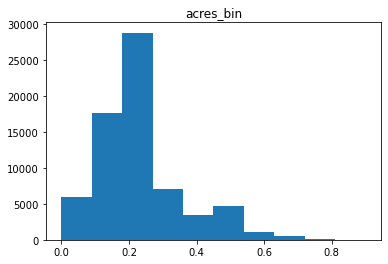

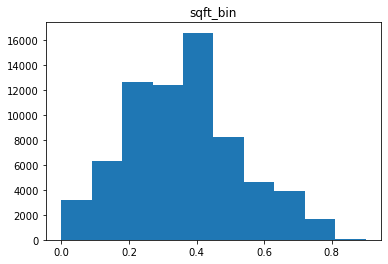

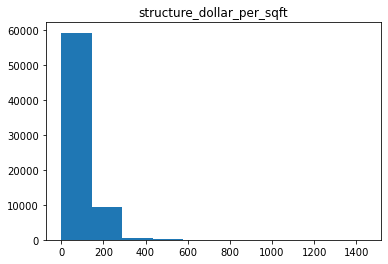

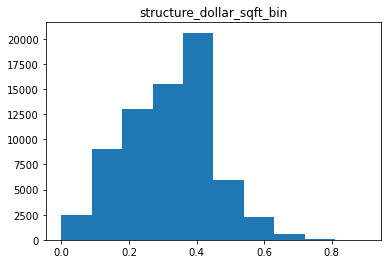

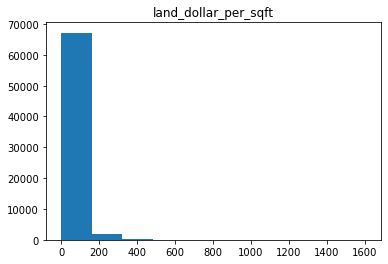

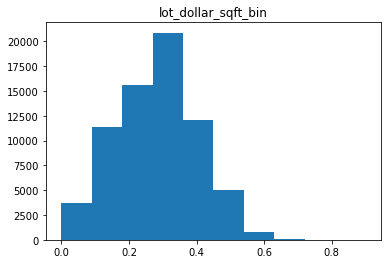

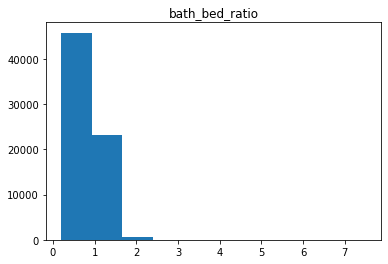

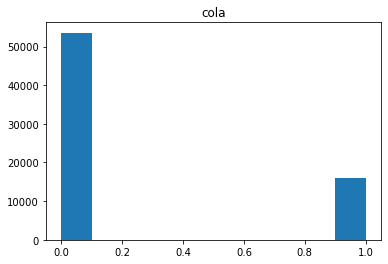

In [10]:
for col in df_1.columns:
    plt.hist(df_1[col])
    plt.title(col)
    plt.show()

In [37]:
dropcols = ['county']
df_1 = wrangle.remove_columns(df_1, dropcols)
partitions = wrangle.split(df_1, target_var='logerror')

In [38]:
#Restart Kernel and split.  Then do the partitions df that has the logerror bins, but use the bins discovered below! 

train = partitions[0]
train['logerror_bins'] = pd.cut(train.logerror, [-.5, -.45, -.4, -.35, -.3, -.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5]) 
partitions[0] = train

In [39]:
train.logerror_bins.value_counts()

(0.0, 0.05]      14254
(-0.05, 0.0]     11505
(0.05, 0.1]       4071
(-0.1, -0.05]     3089
(0.1, 0.15]       1443
(-0.15, -0.1]     1044
(0.15, 0.2]        645
(0.2, 0.25]        467
(-0.2, -0.15]      448
(-0.25, -0.2]      261
(0.25, 0.3]        254
(0.3, 0.35]        215
(-0.3, -0.25]      152
(0.35, 0.4]        119
(0.4, 0.45]        105
(-0.35, -0.3]       90
(0.45, 0.5]         73
(-0.4, -0.35]       51
(-0.45, -0.4]       45
(-0.5, -0.45]       39
Name: logerror_bins, dtype: int64

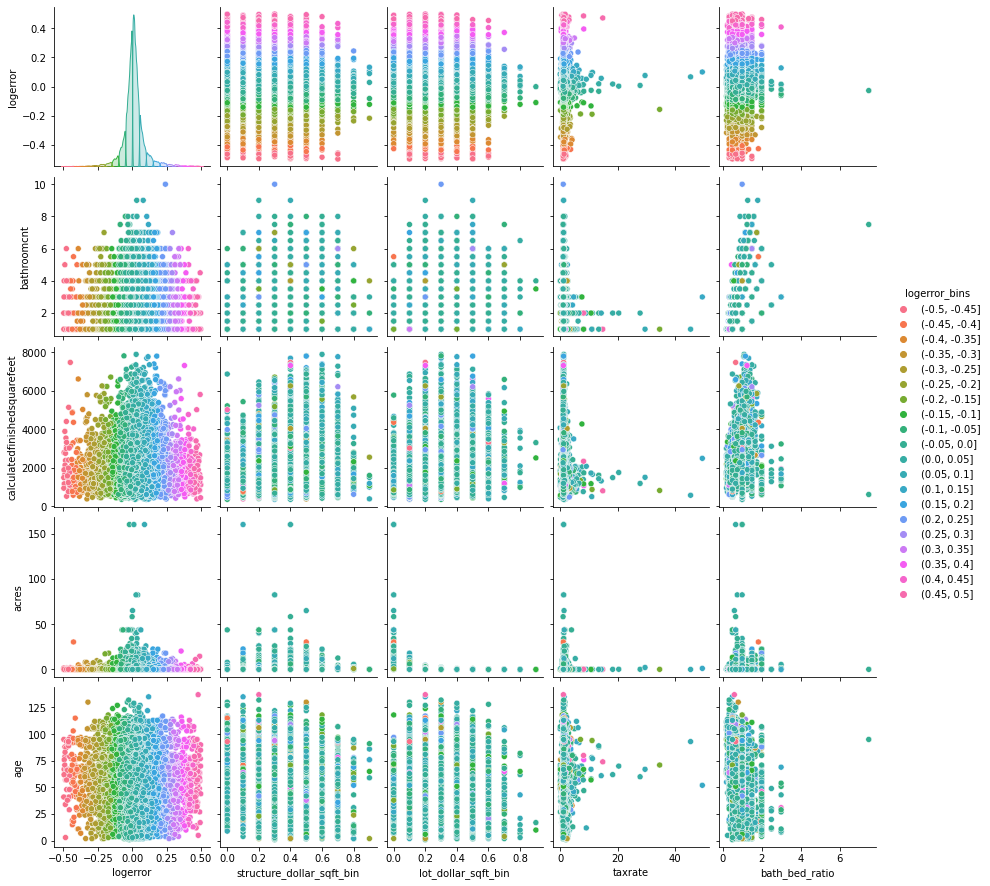

In [14]:
sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'taxrate', 
                       'bath_bed_ratio'],
             y_vars = ['logerror', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'acres', 'age'])

In [14]:
#The above shows that yes, most logerror is the turquoise or -.1 through .1, but we can also see that the other errors showing up clearly in age, calculated finished sq ft, bathroom count, tax rate, and bed/bath ratio.

### Logerror is greatest for properties between ~50-80 years old; the fewer acres, the greater the logerror; logerror is greater for finishedsqft <2000, greater for bathrooms 1,2,3,4; greater logerror for lower taxrate; greater logerror for bed/bath ratio under 2

### I'd like to cluster on latitude, longitude and sqft_bin

In [40]:
# the variables that still need scaling
scaled_vars = ['latitude', 'longitude', 'bathroomcnt', 'taxrate']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])

In [41]:
X[0].describe()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcounty,roomcnt,unitcnt,...,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate
count,38932.000000,38932.000000,38932.000000,38932.000000,3.893200e+04,3.893200e+04,3.893200e+04,38932.000000,38932.000000,38932.0,...,38932.000000,38932.000000,38932.000000,38932.000000,38932.000000,38932.000000,38932.000000,38932.000000,38932.000000,38932.000000
mean,2.247714,3.004007,6.342983,1723.898130,3.400120e+07,-1.181930e+08,6.049564e+07,2500.884799,1.580576,1.0,...,99.184038,0.305397,40.646629,0.264464,0.781387,0.226729,0.447305,0.673817,0.138635,0.026326
std,0.907849,0.989158,1.362928,846.922922,2.675228e+05,3.604201e+05,2.063429e+05,814.594152,2.898239,0.0,...,60.438921,0.146160,60.888988,0.135472,0.288425,0.418721,0.180852,0.189403,0.100872,0.011666
min,1.000000,1.000000,1.000000,360.000000,3.333953e+07,-1.194753e+08,6.037101e+07,1286.000000,0.000000,1.0,...,0.039833,0.000000,0.003023,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,6.000000,1164.000000,3.380349e+07,-1.184080e+08,6.037400e+07,1286.000000,0.000000,1.0,...,62.434830,0.200000,6.197207,0.200000,0.600000,0.000000,0.313651,0.560850,0.111111,0.023290
50%,2.000000,3.000000,6.000000,1502.000000,3.400943e+07,-1.181620e+08,6.037621e+07,3101.000000,0.000000,1.0,...,91.168957,0.300000,24.873589,0.300000,0.714286,0.000000,0.452871,0.690128,0.111111,0.024562
75%,3.000000,4.000000,7.000000,2037.000000,3.417327e+07,-1.179145e+08,6.059052e+07,3101.000000,0.000000,1.0,...,123.540135,0.400000,51.388510,0.400000,1.000000,0.000000,0.563630,0.820180,0.222222,0.026850
max,10.000000,11.000000,12.000000,7890.000000,3.481877e+07,-1.175723e+08,6.111009e+07,3101.000000,14.000000,1.0,...,1444.221106,0.900000,1604.525311,0.900000,7.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# list of variables I will cluster on. 
cluster_vars = ['scaled_latitude', 'scaled_longitude', 'sqft_bin']
cluster_name = 'area_cluster'
k_range = range(2,20)

In [43]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

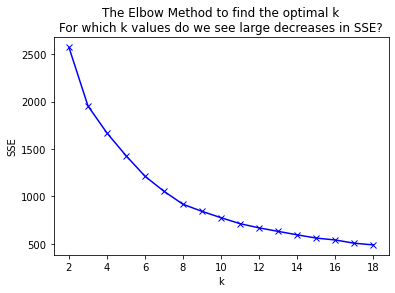

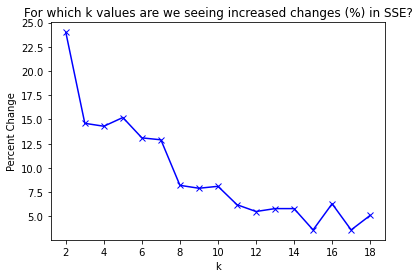

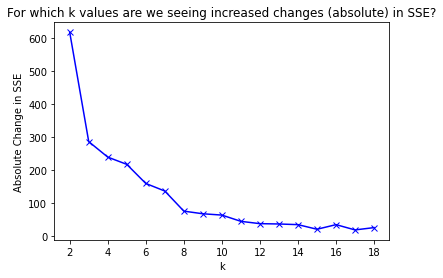

,k,sse,delta,pct_delta
0,2,2573.029780,618.0,24.0
1,3,1954.733163,286.0,14.6
2,4,1669.025385,239.0,14.3
3,5,1430.408173,217.0,15.2
4,6,1213.121530,159.0,13.1
5,7,1053.895830,136.0,12.9
6,8,917.544117,75.0,8.2
7,9,842.699570,67.0,7.9
8,10,775.803653,63.0,8.1
9,11,713.031740,44.0,6.2


In [44]:
find_k(X[0], cluster_vars, k_range)

### It looks like somewhere between 5 and 6 will be the most meaningful.  After 6, things start looking the same or have even variance.

In [122]:
k = 5

In [123]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

In [124]:
kmeans = create_clusters(X[0], k, cluster_vars)

In [125]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df

In [126]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

In [127]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df):
    for i in range(len(X)):
        clusters = pd.DataFrame(kmeans.predict(X[i][cluster_vars]), 
                            columns=[cluster_name], index=X[i].index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        X[i] = pd.concat([X[i], clusters_centroids], axis=1)
    return X

In [128]:
X = assign_clusters(kmeans, cluster_vars, cluster_name, centroid_df)

In [52]:
pd.DataFrame(X[0].groupby(['area_cluster', 'centroid_scaled_latitude', 'centroid_scaled_longitude', 
                           'centroid_sqft_bin'])['area_cluster'].count())

,,,,area_cluster
area_cluster,centroid_scaled_latitude,centroid_scaled_longitude,centroid_sqft_bin,
0,0.320507,0.798850,0.200932,9455
1,0.603681,0.594972,0.494955,8626
2,0.293564,0.830761,0.501858,9308
3,0.540666,0.593839,0.190600,8530
4,0.607324,0.249769,0.401725,3013


### It looks like there may be some significance to clusters 1 & 2 vs 0 & 3 vs 4.

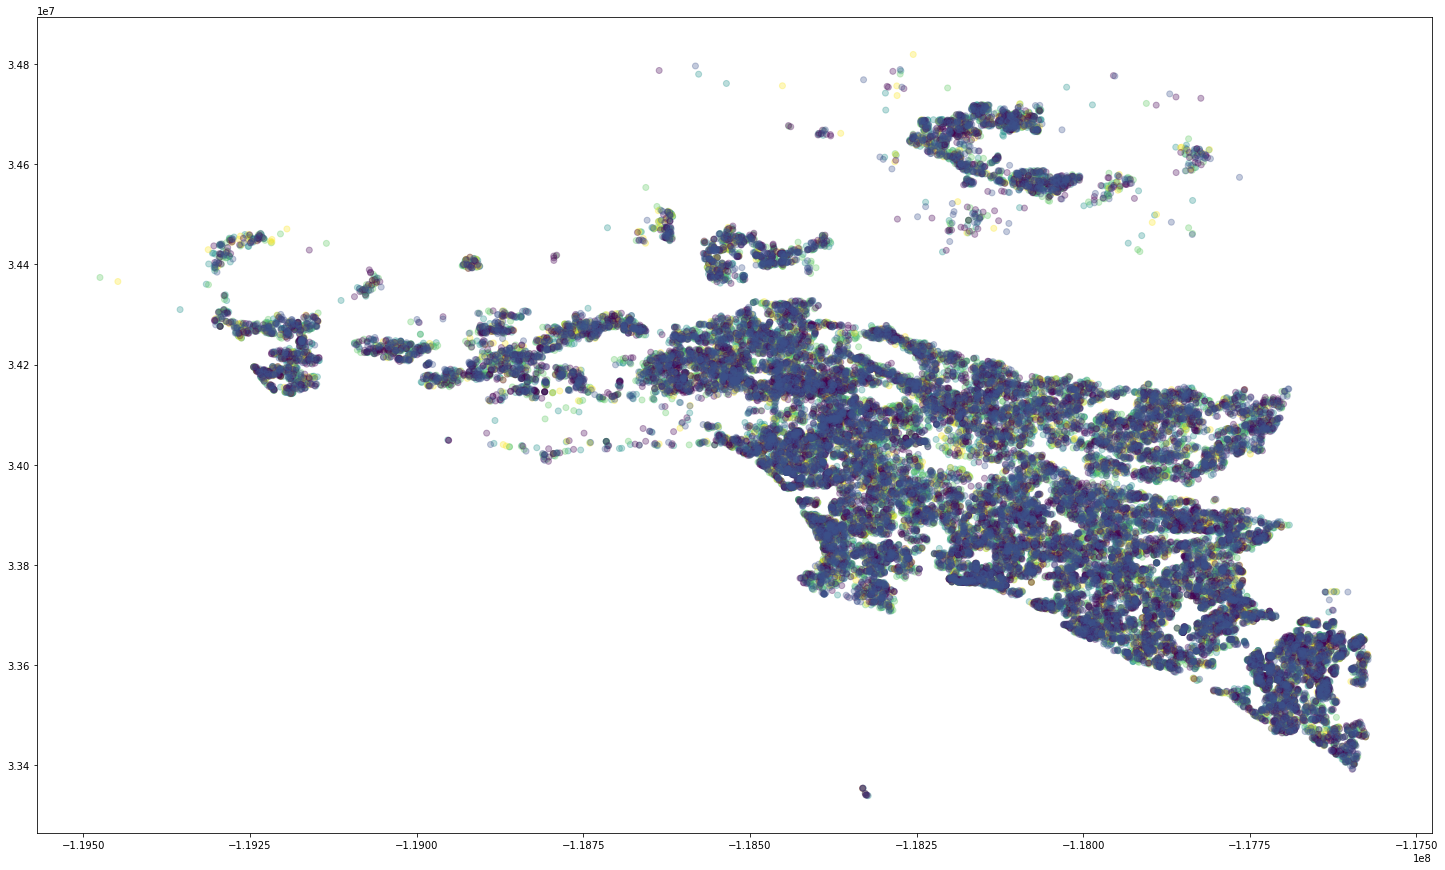

In [94]:
plt.figure(figsize=(25,15))
# plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
plt.scatter(y=X[0].latitude, x=X[0].longitude, c=X[0].area_cluster, alpha=.3)

In [53]:
X[0].head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,latitude,longitude,rawcensustractandblock,regionidcounty,roomcnt,unitcnt,...,bath_bed_ratio,cola,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,area_cluster,centroid_scaled_latitude,centroid_scaled_longitude,centroid_sqft_bin
75698,2.5,3.0,6.0,2368.0,33680878.0,-118026177.0,6.059099e+07,1286.0,0.0,1.0,...,0.833333,0,0.230761,0.761505,0.166667,0.023148,2,0.293564,0.830761,0.501858
46252,2.0,2.0,8.0,1194.0,34143200.0,-118126000.0,6.037464e+07,3101.0,0.0,1.0,...,1.000000,0,0.543301,0.709047,0.111111,0.023901,2,0.293564,0.830761,0.501858
2425,2.0,2.0,6.0,1178.0,34267400.0,-119244000.0,6.111003e+07,2061.0,4.0,1.0,...,1.000000,0,0.627263,0.121531,0.111111,0.021683,2,0.293564,0.830761,0.501858
62560,2.5,3.0,6.0,1800.0,33691124.0,-118001431.0,6.059099e+07,1286.0,0.0,1.0,...,0.833333,0,0.237688,0.774509,0.166667,0.022763,2,0.293564,0.830761,0.501858
68164,1.0,1.0,6.0,1033.0,34284500.0,-119300000.0,6.111002e+07,2061.0,3.0,1.0,...,1.000000,0,0.638823,0.092103,0.000000,0.021759,2,0.293564,0.830761,0.501858


## Clusters do not look meaningful. They seem to be evenly spread all over.

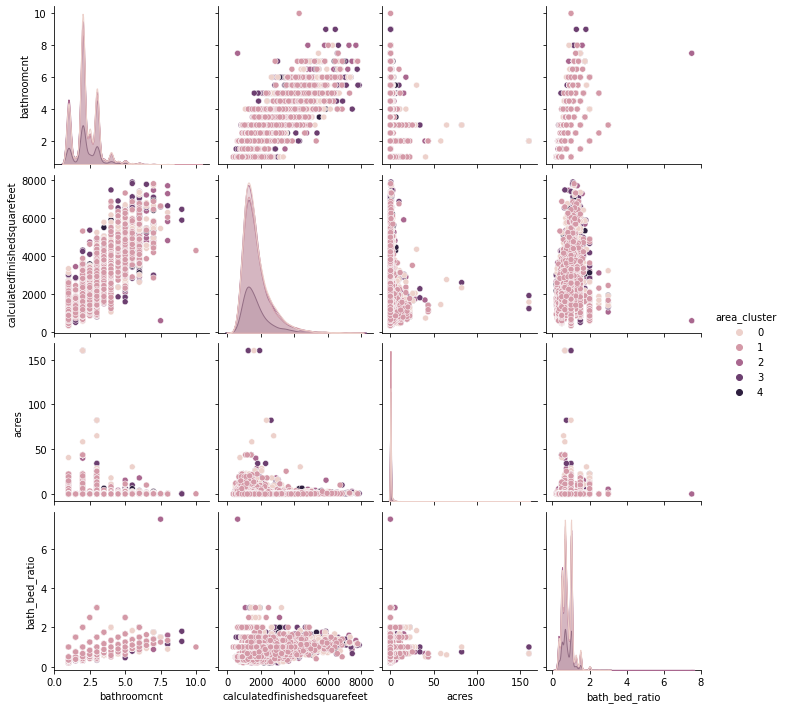

In [40]:
plt_df = X[0][['bathroomcnt', 'calculatedfinishedsquarefeet', 
                    'acres', 'bath_bed_ratio', 'area_cluster']]

sns.pairplot(data=plt_df, hue='area_cluster')

### Clusters 0 and 1 look similar, but there's really not enough to show me that it would be useful.

## Hypothesis testing using Pearson's R to check for correllation between features and target: log error.
### Hopefully this will give some insight on what may be driving logerror.

In [54]:
#Place this function in the wrangle module.
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

### We will set a confidence ratio of 95%. Alpha is set at 0.05%.
### Our null hypothesis: There is no linear correlation between logerror and Calculatedfinishedsquarefeet
### Our alternative hypothesis: There is a linear correlation between logerror and Calculatedfinishedsquarefeet

The p-value is: 1.2779426839868207e-17. There is 0.0% chance that we see these results by chance.
r = 0.04


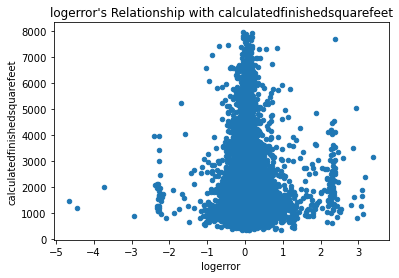

In [30]:
# Compare logerror to calculatedfinishedsqft, latitude, longitude, bed_bath_ratio, acres
### We will set a confidence ratio of 95%. Alpha is set at 0.05%.
### Our null hypothesis: There is no linear correlation between logerror and Calculatedfinishedsquarefeet
### Our alternative hypothesis: There is a linear correlation between logerror and Calculatedfinishedsquarefeet
correlation_exploration(train, 'logerror', 'calculatedfinishedsquarefeet')

### We reject the null hypothesis for the above.

### Using the same confidence ratio of 95%. Alpha is set at 0.05%.
### Our null hypothesis: There is no linear correlation between logerror and latitude.
### Our alternative hypothesis: There is a linear correlation between logerror and latitude.

The p-value is: 0.001518750391405347. There is 0.002% chance that we see these results by chance.
r = -0.02


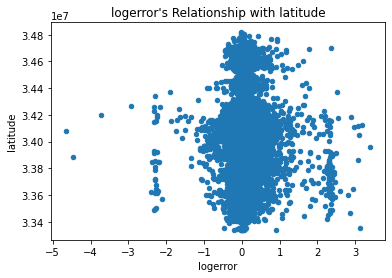

In [44]:
correlation_exploration(train, 'logerror', 'latitude')

### We accept the null hypothesis for the above.

### Using the same confidence ratio of 95%. Alpha is set at 0.05%.
### Our null hypothesis: There is no linear correlation between logerror and longitude.
### Our alternative hypothesis: There is a linear correlation between logerror and longitude.

The p-value is: 0.0009006376561893873. There is 0.001% chance that we see these results by chance.
r = 0.02


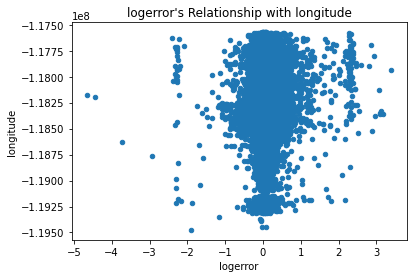

In [45]:
correlation_exploration(train, 'logerror', 'longitude')

### We accept the null hypothesis for the above.

### Using the same confidence ratio of 95%. Alpha is set at 0.05%.
### Our null hypothesis: There is no linear correlation between logerror and bath_bed_ratio.
### Our alternative hypothesis: There is a linear correlation between logerror and bath_bed_ratio.

The p-value is: 0.8431862576845132. There is 0.843% chance that we see these results by chance.
r = -0.0


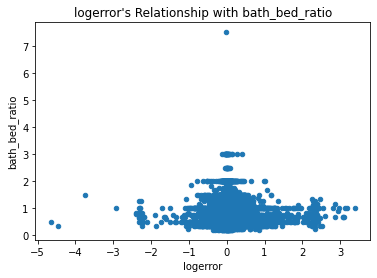

In [47]:
correlation_exploration(train, 'logerror', 'bath_bed_ratio')

### We accept the null hypothesis for the above.

### Using the same confidence ratio of 95%. Alpha is set at 0.05%.
### Our null hypothesis: There is no linear correlation between logerror and acres.
### Our alternative hypothesis: There is a linear correlation between logerror and acres.

The p-value is: 0.0008523997921687042. There is 0.001% chance that we see these results by chance.
r = 0.02


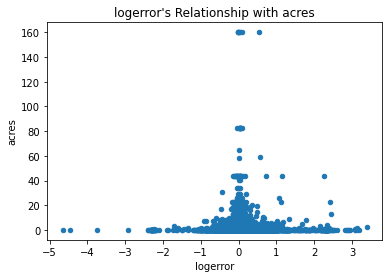

In [48]:
correlation_exploration(train, 'logerror', 'acres')

### We reject the null hypothesis for the above.

### Takeaways from above, so far the features that seem to have a relationship with logerror is the calculated finished square feet.

### I would like to model on calculated finished square feet and latitute and longitude.

In [55]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
#y_train = pd.DataFrame(y_train)
#y_validate = pd.DataFrame(y_validate)
y_train = partitions[4]
y_validate = partitions[5]

# 1. Predict logerror_pred_mean
logerror_pred_mean = y_train['logerror'].mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean

# 2. compute logerror_pred_median
logerror_pred_median = y_train['logerror'].median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.17 
Validate/Out-of-Sample:  0.16
RMSE using Median
Train/In-Sample:  0.17 
Validate/Out-of-Sample:  0.16


In [102]:
baseline_mean = logerror_pred_mean
round(baseline_mean, 6)

0.016403

In [103]:
baseline_median = logerror_pred_median
round(baseline_median, 6)

0.006635

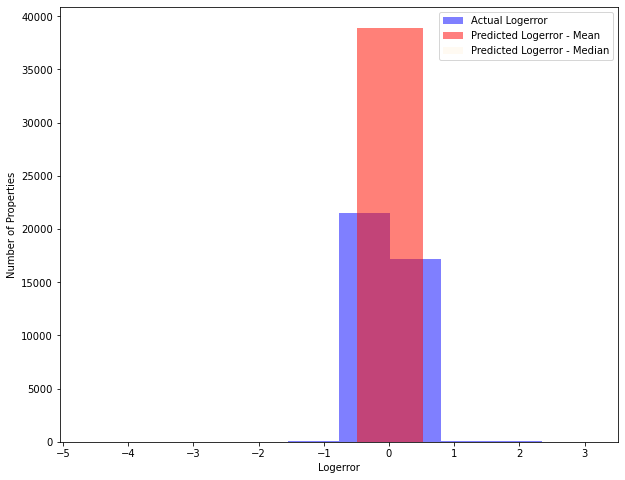

In [58]:

plt.figure(figsize=(10,8))
# plot to visualize actual vs predicted. 

plt.hist(y_train.logerror, color='blue', alpha=.5, label="Actual Logerror")
plt.hist(y_train.logerror_pred_mean, bins=1, color='red', alpha=.5, rwidth=100, label="Predicted Logerror - Mean")
plt.hist(y_train.logerror_pred_median, bins=1, color='orange', alpha=.05, rwidth=100, label="Predicted Logerror - Median")
plt.xlabel("Logerror")
plt.ylabel("Number of Properties")
plt.legend()
plt.show()

### As you can see from the above chart, the baseline is much different than the actual.  Hopefully with modeling we can improve the baseline.

In [65]:
X_validate = partitions[1]
y_validate = partitions[4]

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.16995741450924784 
Validation/Out-of-Sample:  0.16995741450924784


In [68]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.17041290010855104 
Validation/Out-of-Sample:  0.17041290010855104


In [75]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**(1/2)

# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  0.17015932842534562 
Validation/Out-of-Sample:  0.17015932842534562


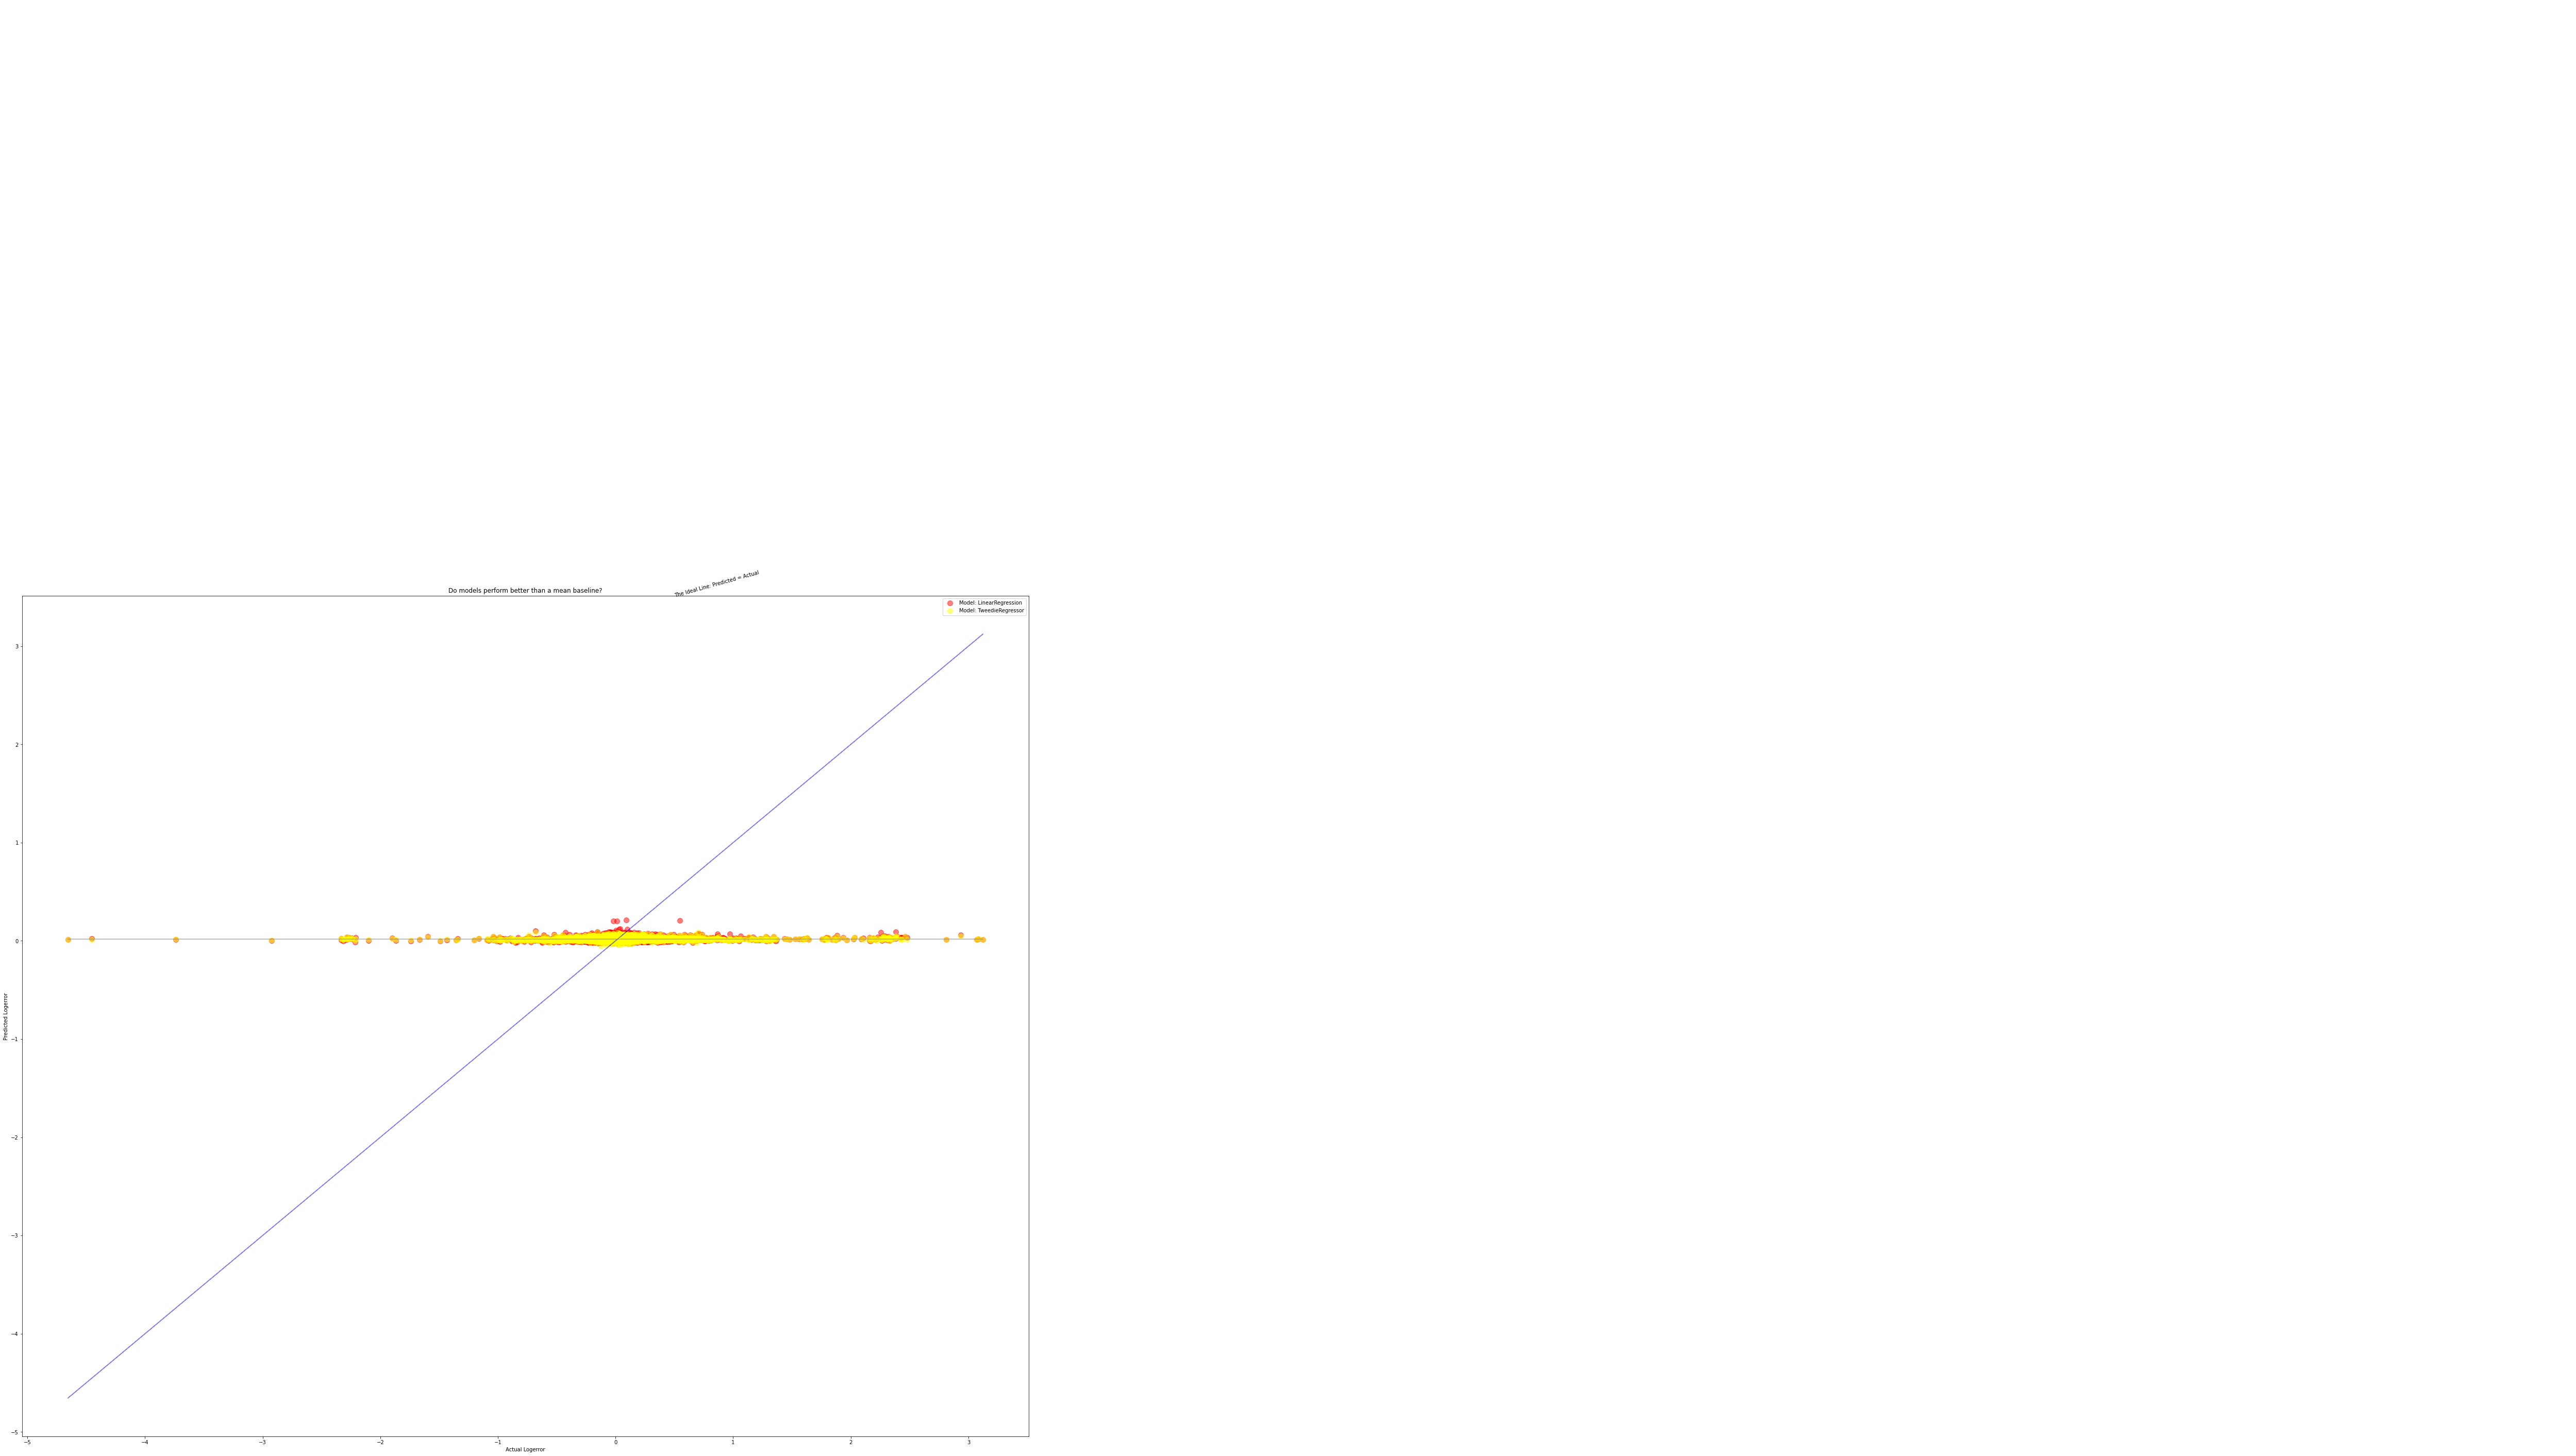

In [79]:
# y_validate.head()
plt.figure(figsize=(35,30))
plt.plot(y_validate.logerror, y_validate.logerror_pred_mean, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.logerror, y_validate.logerror, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.logerror, y_validate.logerror_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.logerror, y_validate.logerror_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
#plt.scatter(y_validate.G3, y_validate.G3_pred_lm2, 
#            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Logerror")
plt.ylabel("Predicted Logerror")
plt.title("Do models perform better than a mean baseline?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()

### Let's try a Random Forest model to see if we can see what the most important features are for logerror?

In [82]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [87]:
X_train.info()
#features I'm interested in: calculatedfinsishedsquarefeet, latitude, longitude, age, bath_bed_ratio

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38932 entries, 75698 to 7949
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   38932 non-null  float64
 1   bedroomcnt                    38932 non-null  float64
 2   buildingqualitytypeid         38932 non-null  float64
 3   calculatedfinishedsquarefeet  38932 non-null  float64
 4   latitude                      38932 non-null  float64
 5   longitude                     38932 non-null  float64
 6   rawcensustractandblock        38932 non-null  float64
 7   regionidcounty                38932 non-null  float64
 8   roomcnt                       38932 non-null  float64
 9   unitcnt                       38932 non-null  float64
 10  taxvaluedollarcnt             38932 non-null  float64
 11  assessmentyear                38932 non-null  float64
 12  age                           38932 non-null  float64
 13

### Let's set a X and y train with just the features for this model.

In [95]:
X_trainC = X_train[['calculatedfinishedsquarefeet', 'latitude', 'longitude', 'age', 'bath_bed_ratio']]
y_trainC = y_train.logerror

X_validateC = X_validate[['calculatedfinishedsquarefeet', 'latitude', 'longitude', 'age', 'bath_bed_ratio']]
y_validateC = y_validate.logerror

In [99]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_trainC, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_trainC)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validateC)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.17021801002347864 
Validation/Out-of-Sample:  0.17021801002347864


In [100]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_trainC, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_trainC)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validateC)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.17041290010855104 
Validation/Out-of-Sample:  0.17041290010855104


In [101]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_trainC, y_train.logerror)

# predict train
y_train['logerror_pred_glm'] = glm.predict(X_trainC)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**(1/2)

# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validateC)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=0 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=0 & alpha=0
Training/In-Sample:  0.1704017152609081 
Validation/Out-of-Sample:  0.1704017152609081


****
### Baseline: .016403
****

****
### Using all features: 
### Tweedie Regressor: .170159
### Lasso + Lars: .170413
### OLS Linear Regression: .169957
****

****
### Using only the selected features, the models above:  
### Tweedie Regressor: .170402
### Lasso + Lars: .170413
### OLS Linear Regression: .170218
****

In [116]:

print ("The Tweedie Regressor model using selected features only, does",(round((.170402 - .170159), 6)* 100),'% better than using all features, and', (round((.170402 - .016403), 5)* 100),'% better than baseline.')

The Tweedie Regressor model using selected features only, does 0.0243 % better than using all features, and 15.4 % better than baseline.


In [119]:
print ("The OLS Linear Regression model using selected features only, does",(round((.170218 - .170159), 6)* 100),'% better than using all features, and', (round((.170218 - .016403), 3)* 100),'% better than baseline.')

The OLS Linear Regression model using selected features only, does 0.0059 % better than using all features, and 15.4 % better than baseline.


### This suggests that the selected features may drive logerror more than all features.  To further understand what is driving logerror, my future iterations would include different groupings of features to get the best overall performance.

In [9]:
train, validate, test = wrangle.train_validate_test_split(df)

In [10]:
print (train.shape)
print (validate.shape)
print (test.shape)

(41713, 24)
(13905, 24)
(13905, 24)


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41713 entries, 42186 to 4990
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   41713 non-null  float64
 1   bedroomcnt                    41713 non-null  float64
 2   buildingqualitytypeid         41713 non-null  float64
 3   calculatedfinishedsquarefeet  41713 non-null  float64
 4   fips                          41713 non-null  float64
 5   latitude                      41713 non-null  float64
 6   longitude                     41713 non-null  float64
 7   lotsizesquarefeet             41713 non-null  float64
 8   rawcensustractandblock        41713 non-null  float64
 9   regionidcity                  41713 non-null  float64
 10  regionidcounty                41713 non-null  float64
 11  regionidzip                   41713 non-null  float64
 12  roomcnt                       41713 non-null  float64
 13

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

Bonus:

In [12]:
#Some general notes:
#The target is logerror
#I suppose the overarching question would be what feature or set of features
#are most correllated to logerror?
#Another overarching question might be what features or groups have the highest amount of logerror?
#And finally, I'm curious overall- are there specific groups (considering combinations of features)
#that explain disctinct delineations of logerror? 

In [14]:
#sns.pairplot(train)

In [15]:
#<~3-4 bathrooms, 5 bedrooms, 3000 sqft, small lot size, the log error increases.
#as the home value increases, the logerror seems to decrease
#there seems to be more logerror for LosAngeles County
#regionidcity lower values have more logerror


<AxesSubplot:>

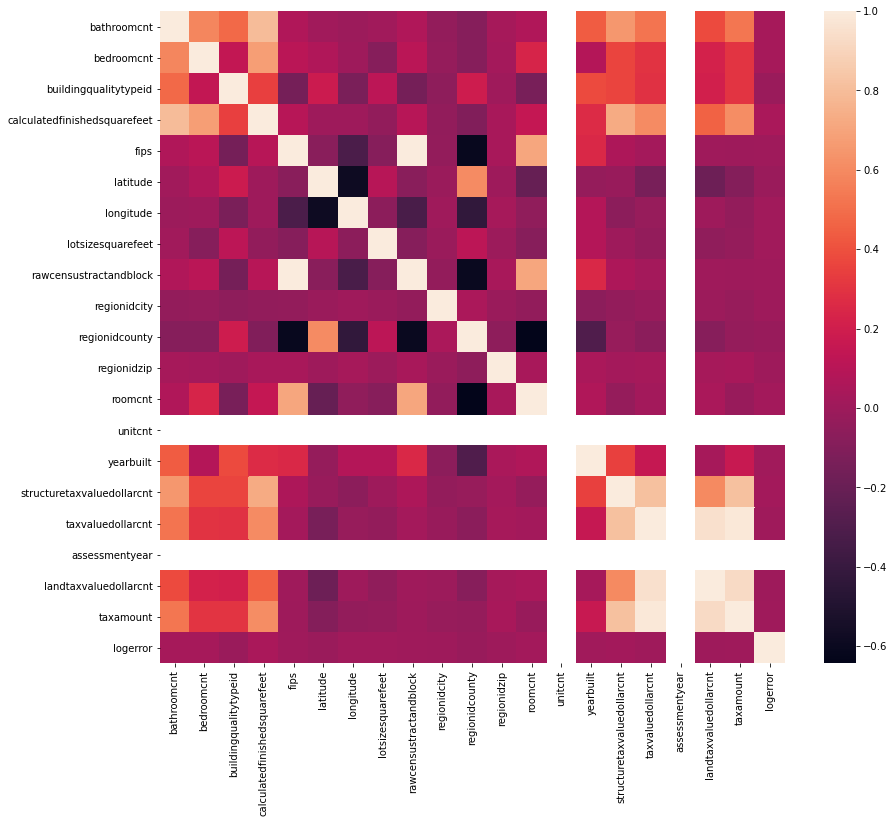

In [30]:

plt.figure(figsize=(14,12))
sns.heatmap(train.corr(), annot=False)

##### The heatmap shows us there is not much strongly correllating anything to logerror.  There is very slight correllation between bathroom,  bedroom, and sqft.

In [31]:
logerror_corellation = train.corr()["logerror"].sort_values(ascending=False)
logerror_corellation

logerror                        1.000000
calculatedfinishedsquarefeet    0.046396
bedroomcnt                      0.035710
bathroomcnt                     0.031117
structuretaxvaluedollarcnt      0.022042
roomcnt                         0.020550
lotsizesquarefeet               0.016433
longitude                       0.013550
yearbuilt                       0.011524
taxvaluedollarcnt               0.008494
rawcensustractandblock          0.007858
fips                            0.007807
taxamount                       0.006330
regionidcity                    0.004779
regionidzip                     0.003927
landtaxvaluedollarcnt           0.000064
buildingqualitytypeid          -0.010342
latitude                       -0.013756
regionidcounty                 -0.016416
unitcnt                              NaN
assessmentyear                       NaN
Name: logerror, dtype: float64

##### This gives us the same info regarding relationship to logerror, but at least we have a list in order.  The top features are still the same.

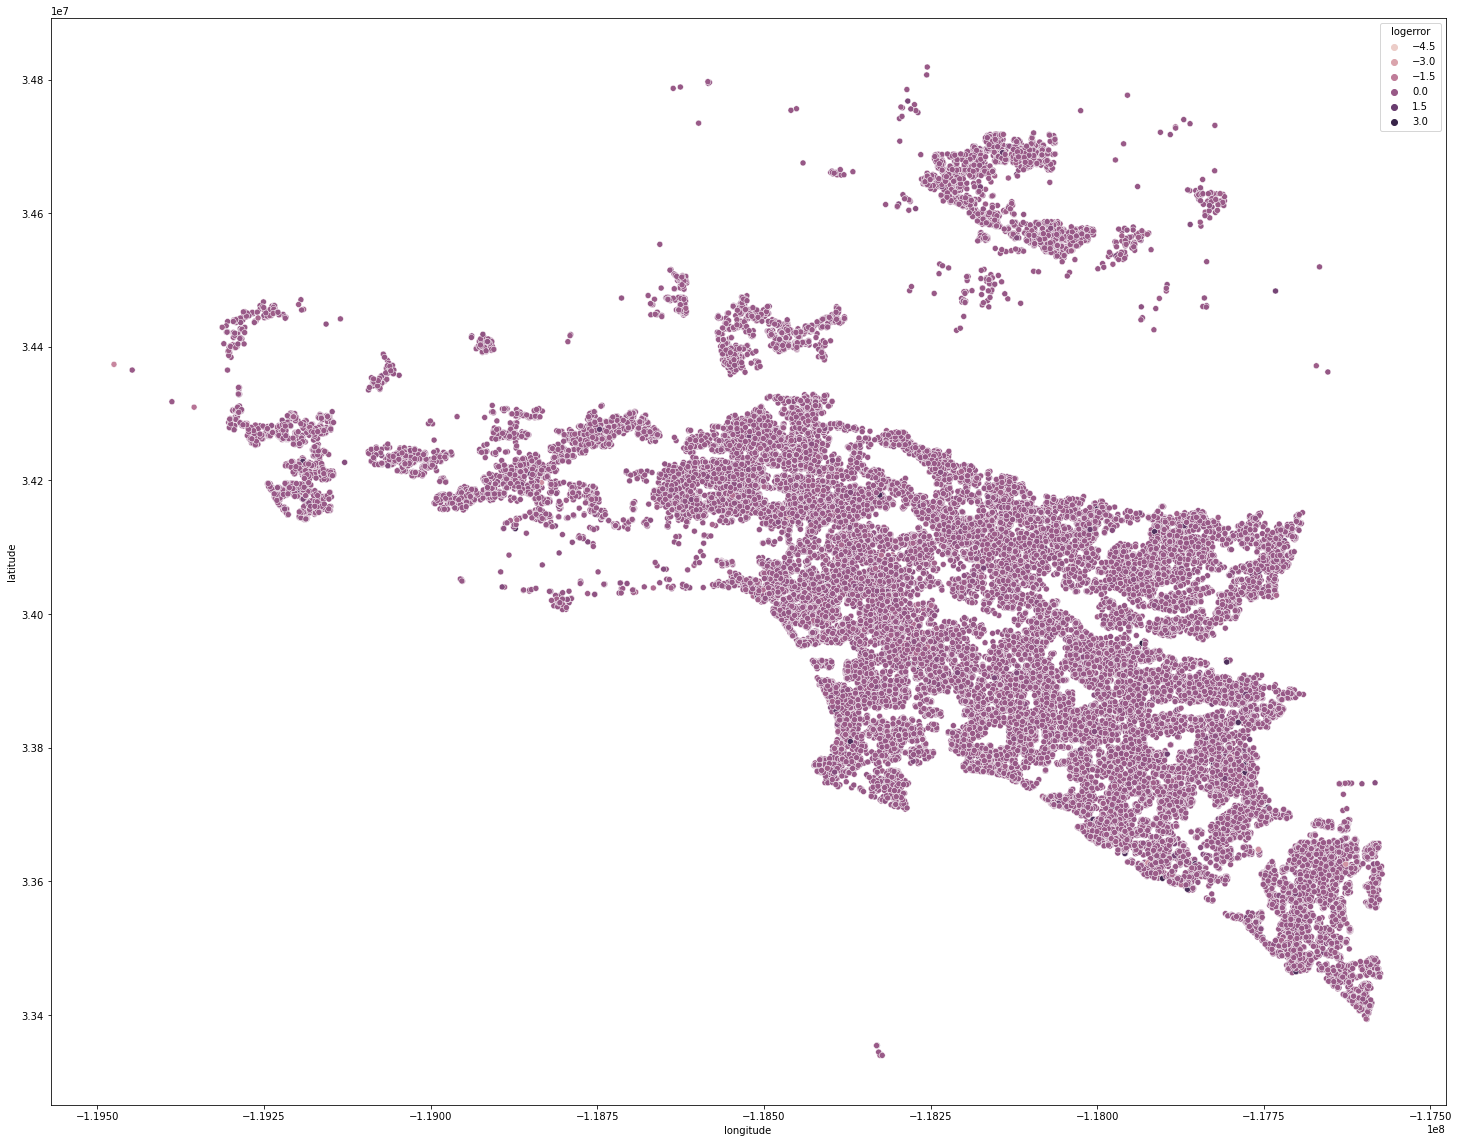

In [38]:
plt.figure(figsize=(25,20))
sns.scatterplot('longitude', 'latitude', data=train, hue='logerror')

plt.show()

In [45]:
print (train.logerror.min())
print (train.logerror.max())

-4.65542037764
3.39454406516


In [46]:
train.logerror.value_counts(bins=[-4.66, -3.5, -2.5, -1.5, 0, 1.5, 2.5, 3.5])

(0.0, 1.5]                     23511
(-1.5, 0.0]                    18090
(1.5, 2.5]                        80
(-2.5, -1.5]                      23
(2.5, 3.5]                         7
(-4.6610000000000005, -3.5]        2
(-3.5, -2.5]                       0
Name: logerror, dtype: int64

<AxesSubplot:>

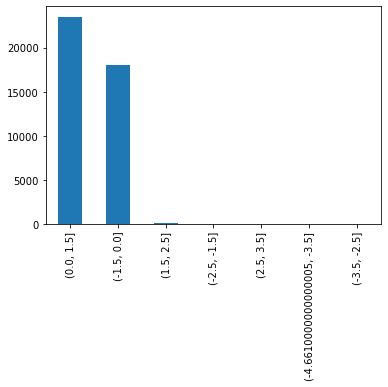

In [62]:
train.logerror.value_counts(bins=[-4.66, -3.5, -2.5, -1.5, 0, 1.5, 2.5, 3.5]).plot.bar()

##### Most logerror is between -1.5 and 1.5, so i'll create bins using those values

In [47]:
train.logerror.value_counts(bins=[-1.5, -1.25, -1, -.75, -.5, -.25, 0, .25, .5, .75, 1, 1.25, 1.5])

(0.0, 0.25]        22367
(-0.25, 0.0]       17547
(0.25, 0.5]          796
(-0.5, -0.25]        404
(0.5, 0.75]          232
(-0.75, -0.5]         80
(0.75, 1.0]           66
(-1.0, -0.75]         42
(1.0, 1.25]           37
(-1.25, -1.0]         13
(1.25, 1.5]           13
(-1.501, -1.25]        4
Name: logerror, dtype: int64

<AxesSubplot:>

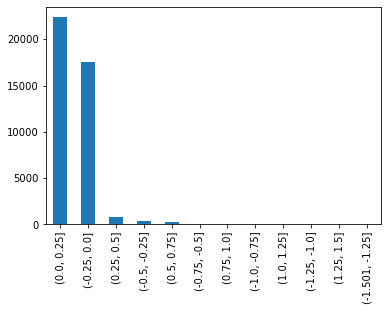

In [63]:
train.logerror.value_counts(bins=[-1.5, -1.25, -1, -.75, -.5, -.25, 0, .25, .5, .75, 1, 1.25, 1.5]).plot.bar()

##### It appears there is a significant number of properties with logerrors of -.5 and .5.   There is even more properties with -.25 and .25 logerror.

In [48]:
train.logerror.value_counts(bins=[ -.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25])

(0.0, 0.05]       15468
(-0.05, 0.0]      12378
(0.05, 0.1]        4232
(-0.1, -0.05]      3288
(0.1, 0.15]        1460
(-0.15, -0.1]      1092
(0.15, 0.2]         737
(-0.2, -0.15]       519
(0.2, 0.25]         470
(-0.251, -0.2]      270
Name: logerror, dtype: int64

<AxesSubplot:>

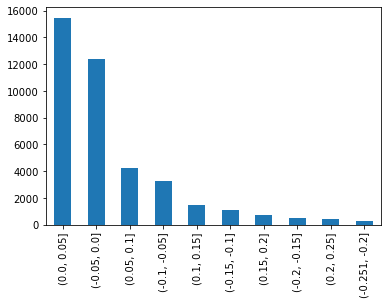

In [64]:
train.logerror.value_counts(bins=[ -.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25]).plot.bar()

##### You can kind of see groups appearing. This may be helpful as we cluster and run correlation testing.

In [50]:
train.logerror.value_counts(bins=[-.5, -.45, -.4, -.35, -.3, -.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5])

(0.0, 0.05]        15468
(-0.05, 0.0]       12378
(0.05, 0.1]         4232
(-0.1, -0.05]       3288
(0.1, 0.15]         1460
(-0.15, -0.1]       1092
(0.15, 0.2]          737
(-0.2, -0.15]        519
(0.2, 0.25]          470
(-0.25, -0.2]        270
(0.25, 0.3]          266
(0.3, 0.35]          233
(-0.3, -0.25]        152
(0.35, 0.4]          122
(0.4, 0.45]          101
(-0.35, -0.3]         96
(0.45, 0.5]           74
(-0.4, -0.35]         69
(-0.45, -0.4]         55
(-0.501, -0.45]       32
Name: logerror, dtype: int64

<AxesSubplot:>

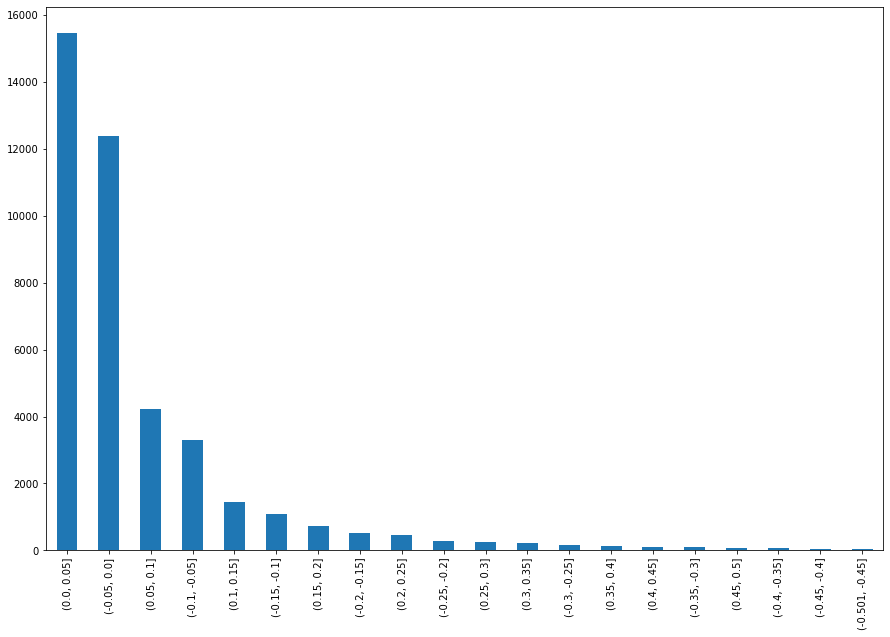

In [61]:
plt.figure(figsize=(15,10))
train.logerror.value_counts(bins=[-.5, -.45, -.4, -.35, -.3, -.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5]).plot.bar()

<AxesSubplot:>

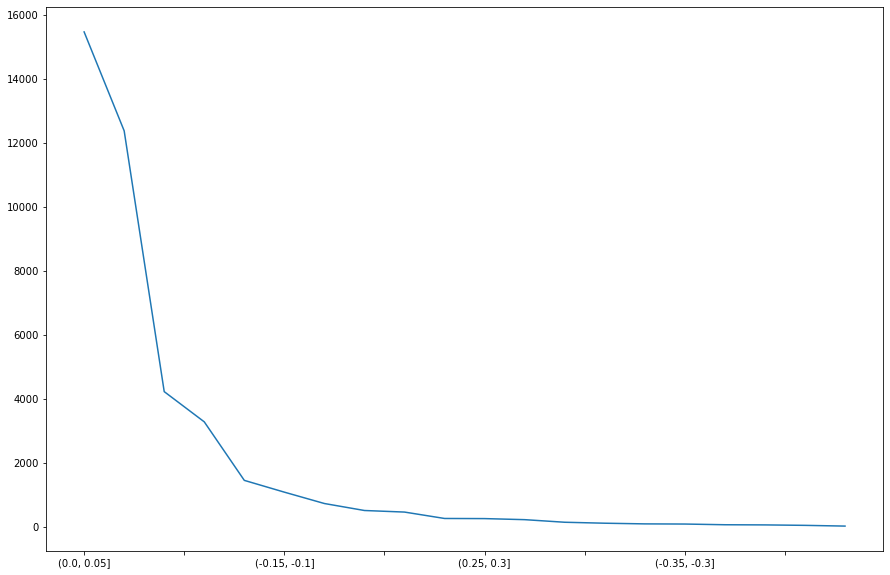

In [65]:
plt.figure(figsize=(15,10))
train.logerror.value_counts(bins=[-.5, -.45, -.4, -.35, -.3, -.25, -.2, -.15, -.1, -.05, 0, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5]).plot()

### Takeaways from visualizing the log errors in bins:
##### 1. There seems to be groupings of properties that share the same range of log errors.
        - I'll call these ranges: -.05 up to .05 is the largest grouping. Then |.05| to |.1| as the 2nd largest grouping. Finally, logerror above .1(but less than .5) and below -.1(but greater than -.5)
 #### So, now the question is what properties are in those groups? Is there a pattern? Are there clusters of features that are similar within those log errors?

In [91]:
print (((train.logerror >= -0.05) & (train.logerror <= 0.05)).sum())
print (((train.logerror < -0.05) & (train.logerror >= -0.1) | (train.logerror > 0.05) & (train.logerror <= 0.1)).sum())
print (((train.logerror < -0.1) & (train.logerror >= -0.5) | (train.logerror > 0.1) & (train.logerror <= 0.5)).sum())

27846
7520
5748


In [93]:
#how do i create these groups as variables in a single column? I want there to be a column called logerror_bins.  I'd like to explore into those groups. I'd like to cluster using those.

In [105]:
((train.logerror >= -0.05) & (train.logerror <= 0.05))[0:4]

42186     True
17405    False
15241     True
22227     True
Name: logerror, dtype: bool

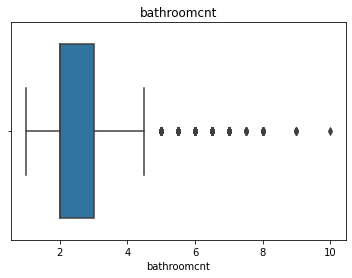

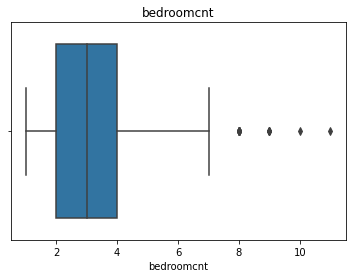

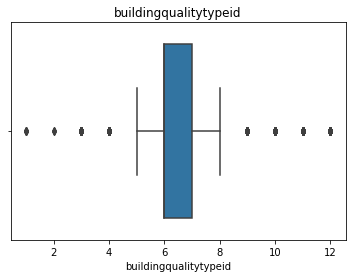

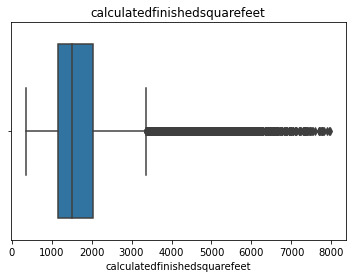

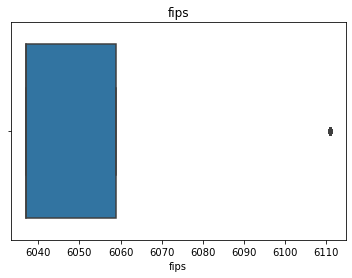

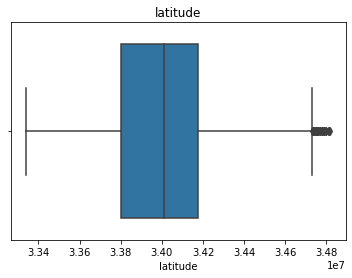

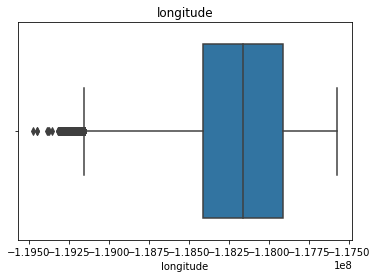

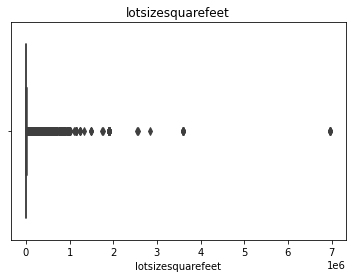

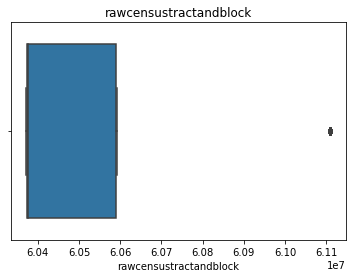

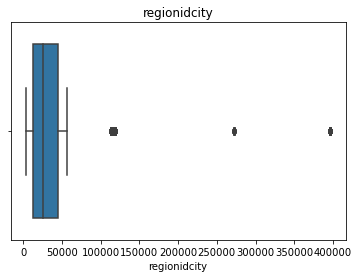

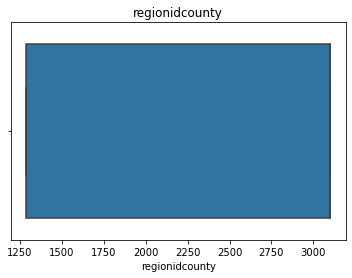

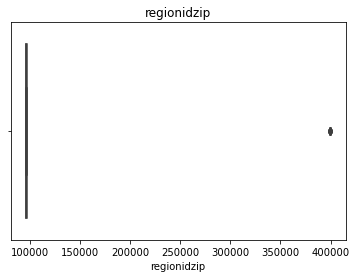

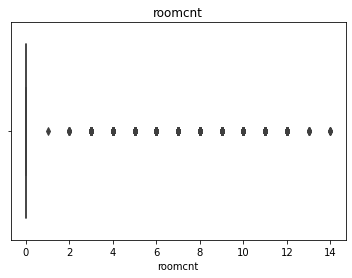

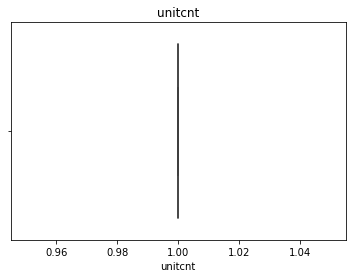

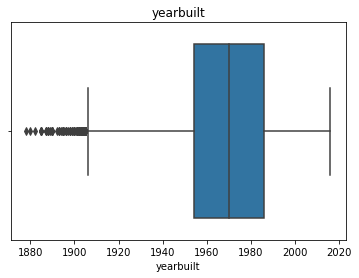

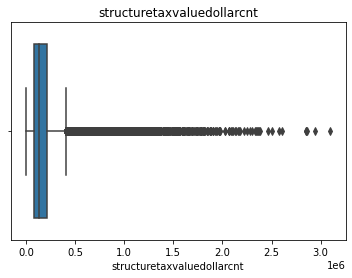

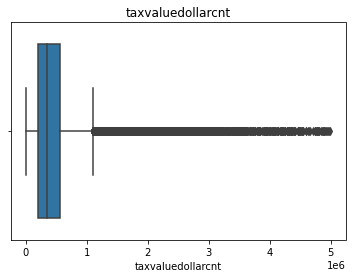

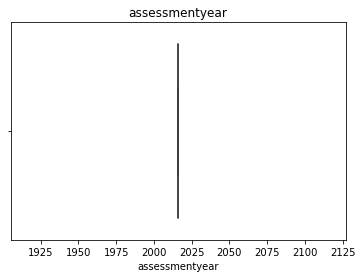

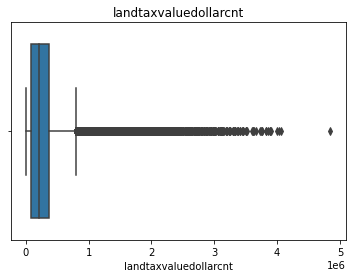

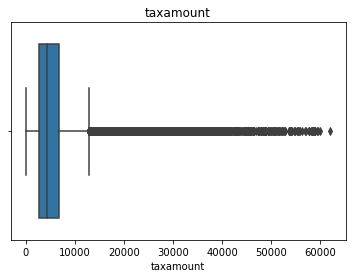

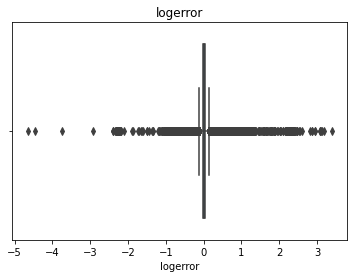

TypeError: Horizontal orientation requires numeric `x` variable.

In [75]:
for col in train.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()